# Multifluid+Association

Version 0.22 of teqp adds a new sort of hybrid model -- a combination of multifluid model plus an association model. Conceptually the pure fluid EOS consider the self-association implicitly, so you may want to consider the association model to only allow cross-assocation, which be enforced by supplying the "self_assocation_mask" logical mask in the "options" of the model. See below

In [69]:
import teqp, json, numpy as np
import matplotlib.pyplot as plt
import pandas 

BIP = [{
    "Name1": "Water",
    "Name2": "Ammonia",
    "betaT": 1.0,
    "gammaT": 1.0,
    "betaV": 1.0,
    "gammaV": 1.0,
    "F": 0.0
}]
jmf = {
    "components": ["Water", "Ammonia"],
    "root": teqp.get_datapath(),
    "BIP": BIP,    
}

jassoc = {
    "kind": "Dufal",
    "model": {
        "sigma / m": [3.0555e-10, 3.3309e-10],
        "epsilon / J/mol": [3475.445374388054, 323.70*8.3124462618],
        "lambda_r": [35.823, 36.832],
        
        # Note the scaling factors of 0.2 on the bonding energy to yield more reasonable behavior
        "epsilon_HB / J/mol": [0.2*13303.140189045183, 0.2*1105.0*8.314462618], 
        
        "K_HB / m^3": [496.66e-30, 560.73e-30],
        "kmat": [[0.0,0.0],[0.0, 0.0]],
        "Delta_rule": "Dufal",
        "molecule_sites": [["e","e","H","H"],["e","H","H","H"]],
        "options": {"self_association_mask": [False, False]}
    }
}
    
j = {
    'kind': 'multifluid-association',
    'model': {
        'multifluid': jmf,
        'association': jassoc
    }
}

model = teqp.make_model(j)

In [70]:
# model.get_assoc_calcs(300, 300, np.array([0.5, 0.5]))

In [71]:
T = 293.15 # K
pure = teqp.build_multifluid_model(["Ammonia"], teqp.get_datapath())
anc = pure.build_ancillaries()
j = model.trace_VLE_isotherm_binary(T, np.array([0, anc.rhoL(T)]), np.array([0, anc.rhoV(T)]))
df = pandas.DataFrame(j)

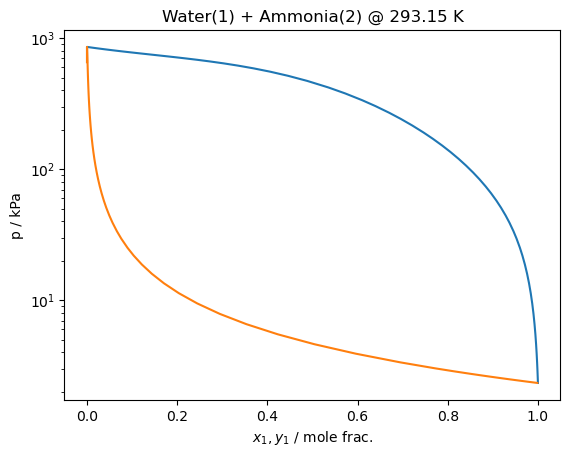

In [74]:
plt.plot(df['xL_0 / mole frac.'], df['pL / Pa']/1e3)
plt.plot(df['xV_0 / mole frac.'], df['pL / Pa']/1e3)
plt.yscale('log')
plt.gca().set(xlabel='$x_1,y_1$ / mole frac.', ylabel='p / kPa')
plt.title(f'Water(1) + Ammonia(2) @ {T} K')
plt.show()